# Decision Trees

## Lecture 4: GRA 4160 - Predictive Modelling with Machine Learning
### Lecturer: Vegard H. Larsen

---
### Overview
- **What are Decision Trees?**
- **Impurity measures** (Gini, Entropy)
- **Building and visualizing a Decision Tree** using scikit-learn
- **Pruning** to avoid overfitting

Decision Trees are used in both **classification** and **regression** contexts. They are often chosen for their **interpretability** and straightforward approach to handling numeric and categorical features. However, trees can grow very deep and overfit unless carefully controlled (e.g., pruning, limiting depth).


## 1. Decision Tree Intuition

A decision tree is built by **recursively partitioning** the data into subsets based on certain splitting criteria. For example:

1. **Root Node**: Contains the entire training set.
2. **Split**: Evaluate each feature and possible thresholds to find a split that best separates the classes.
3. **Child Nodes**: Data is partitioned into subsets based on the selected split.
4. **Repeat** until stopping criteria are met (e.g., max depth, min samples per leaf, or no further improvement).

In **classification** problems, leaf nodes represent class labels (the majority or predicted probability). In **regression**, leaf nodes contain a predicted numeric value (often the mean of that node's samples).

> **Key advantage**: The resulting model is relatively easy to **interpret** (by following the path of splits from root to leaf). The splits can sometimes mimic human decision processes.

> **Key disadvantage**: Decision Trees can **overfit** easily if allowed to grow too large or too specific, capturing noise instead of true patterns.

## 2. Impurity Measures

### Gini Index
For a set \(S\), the **Gini index** is:
$$\text{Gini}(S) = 1 - \sum_{i=1}^{C} p_i^2,$$
where $p_i$ is the fraction of elements in $S$ belonging to class $i$, and $C$ is the number of classes.

- **Interpretation**: Measures the chance of misclassifying a sample if we randomly pick a label from the distribution of classes in $S$.
- Smaller Gini => more homogeneous set.

### Entropy
For a set \(S\), the **entropy** is:
$$\text{Entropy}(S) = -\sum_{i=1}^{C} p_i \log_2(p_i).$$

- **Interpretation**: Measures the "disorder" of $S$. The higher the entropy, the more mixed the classes.
- Lower entropy => more homogeneous set => better purity.

In scikit-learn, you can choose which criterion (`"gini"` or `"entropy"`) to use for splits. In practice, both often yield similar results, although `gini` is somewhat faster to compute.


## 3. Classifying the Iris Dataset with Decision Trees

The **Iris** dataset is a classic dataset with 150 samples, each belonging to one of three species of Iris (Setosa, Versicolor, Virginica). Each sample has 4 features (sepal length, sepal width, petal length, petal width). Our goal is to predict the species of Iris based on these features.

In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Splitting into Training and Test Sets
We'll split 70% of the data for training and 30% for testing, ensuring we can measure how well the model generalizes to unseen data.

In [8]:
# Split the data into features (X) and target (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Train a default Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate on the test set
score = clf.score(X_test, y_test)
print("Accuracy with default DecisionTree:", round(score, 4))

# We'll also visualize how large the trained tree is (in terms of depth)
print("Tree depth:", clf.get_depth())
print("Number of leaves:", clf.get_n_leaves())

Accuracy with default DecisionTree: 0.9778
Tree depth: 4
Number of leaves: 7


### Using Different Criteria: Gini vs. Entropy
The default criterion in scikit-learn is `"gini"`. If we want to use `"entropy"` (which effectively uses **information gain**), we can specify that as follows.

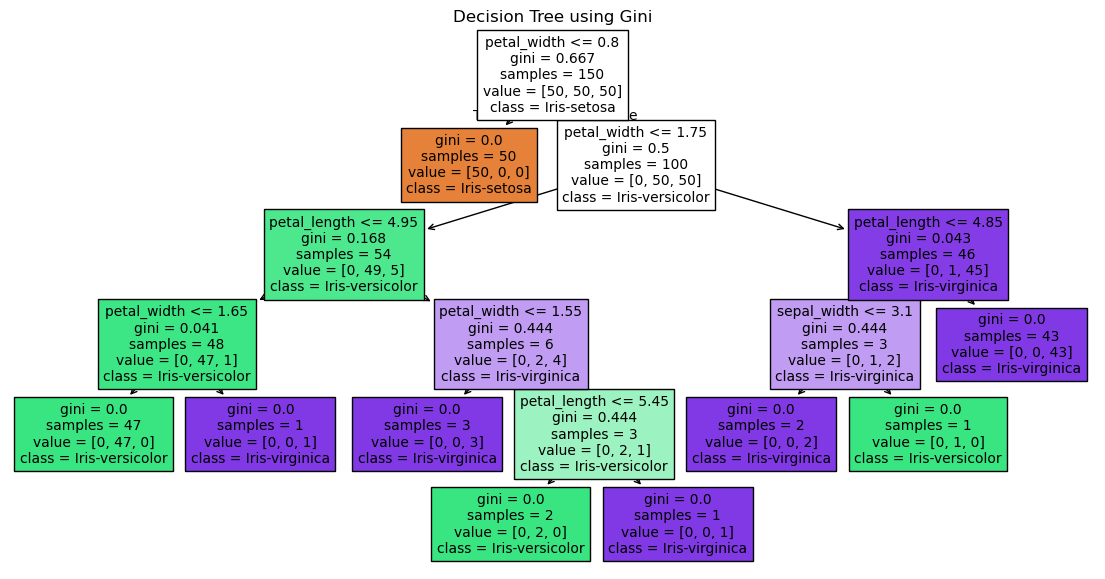

In [9]:
# Training a Decision Tree with Gini index explicitly
clf_gini = DecisionTreeClassifier(random_state=0, criterion='gini')
clf_gini.fit(X, y)

plt.figure(figsize=(14, 7))
plot_tree(
    clf_gini,
    filled=True,
    feature_names=df.columns[:-1],
    class_names=np.unique(y)
)
plt.title("Decision Tree using Gini")
plt.show()

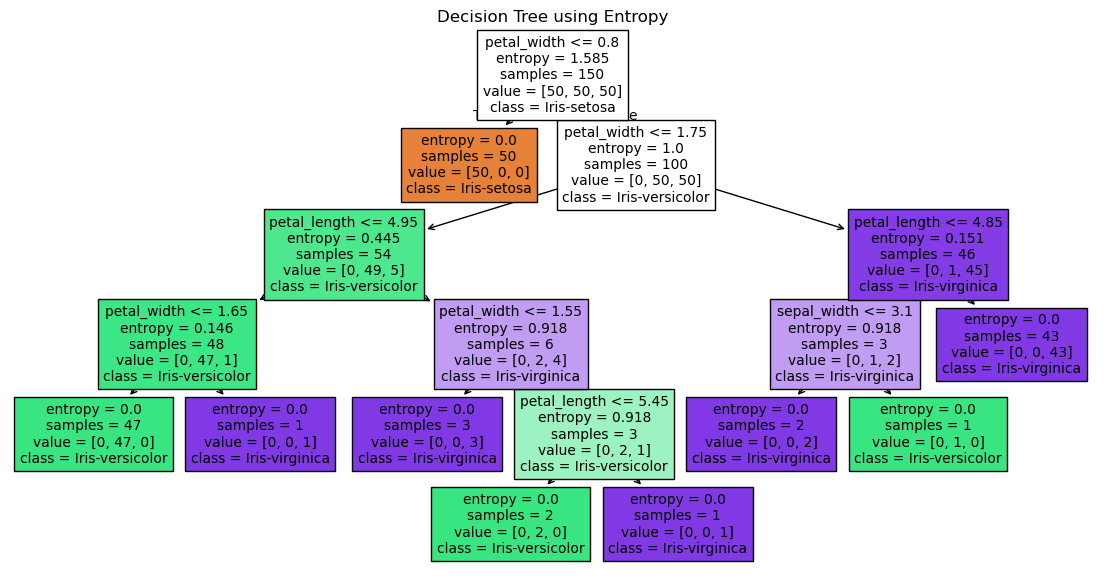

In [10]:
# Training a Decision Tree with Entropy
clf_entropy = DecisionTreeClassifier(random_state=0, criterion='entropy')
clf_entropy.fit(X, y)

plt.figure(figsize=(14, 7))
plot_tree(
    clf_entropy,
    filled=True,
    feature_names=df.columns[:-1],
    class_names=np.unique(y)
)
plt.title("Decision Tree using Entropy")
plt.show()

### A Note on Overfitting
Decision Trees can grow very deep, essentially **memorizing** the training data if no constraints are used.

Common ways to reduce overfitting:
- **Pruning** (e.g., cost complexity pruning, post-pruning, or pre-pruning methods like `min_samples_leaf`)
- **Limiting Tree Depth** (via `max_depth`)
- **Minimum Samples per Split** (`min_samples_split`)
- **Minimum Samples per Leaf** (`min_samples_leaf`)

We'll demonstrate a simple approach by adjusting `min_samples_leaf` to prune the tree.

## 4. Pruning a Decision Tree
Pruning removes branches that **contribute little** to reducing errors on unseen data, **simplifying** the tree.
Below, we show how setting the `min_samples_leaf` hyperparameter to 5 can reduce the tree's complexity.

In [11]:
# Prune the tree by requiring at least 5 samples in each leaf
clf_pruned = DecisionTreeClassifier(
    min_samples_leaf=5,
    random_state=0
)

# Train the classifier
clf_pruned.fit(X_train, y_train)

# Evaluate on the test set
score_pruned = clf_pruned.score(X_test, y_test)
print("Accuracy with min_samples_leaf=5:", round(score_pruned, 4))

# Compare tree depth
print("Tree depth (pruned):", clf_pruned.get_depth())
print("Number of leaves (pruned):", clf_pruned.get_n_leaves())

Accuracy with min_samples_leaf=5: 0.9111
Tree depth (pruned): 3
Number of leaves (pruned): 5


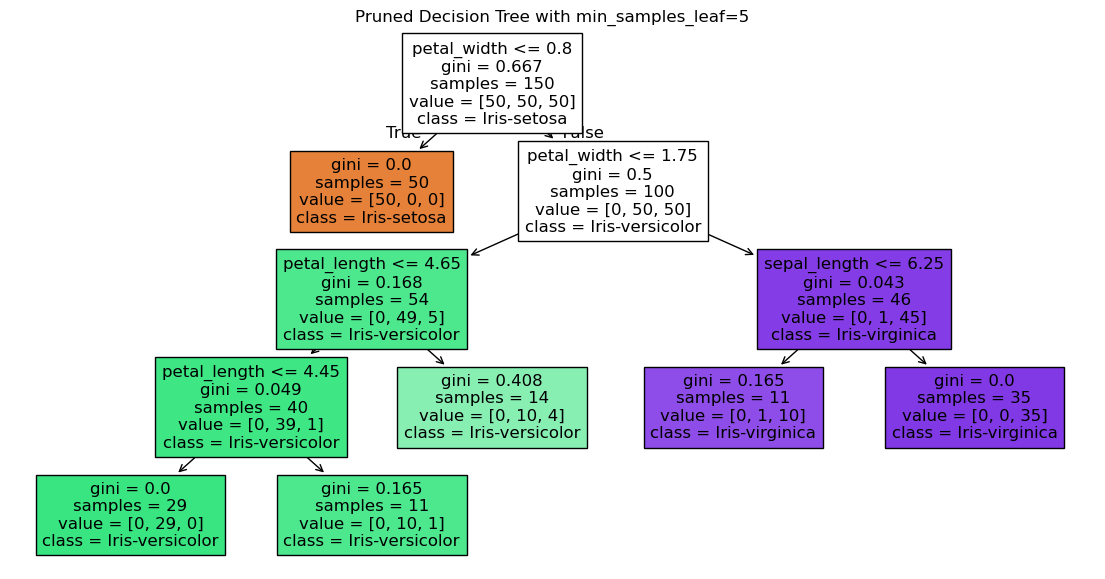

In [12]:
# Let's visualize the pruned tree (trained on the ENTIRE dataset to see full structure)
# NOTE: Typically, you'd want to fit on training set, but we'll do it on X, y for illustration.
clf_pruned_full = DecisionTreeClassifier(
    min_samples_leaf=10,
    random_state=0
)
clf_pruned_full.fit(X, y)

plt.figure(figsize=(14, 7))
plot_tree(
    clf_pruned_full,
    filled=True,
    feature_names=df.columns[:-1],
    class_names=np.unique(y)
)
plt.title("Pruned Decision Tree with min_samples_leaf=5")
plt.show()

### Observations
- Check if the pruned tree has **less depth** and if the accuracy remains acceptable.
- In some cases, pruning can **improve** test-set accuracy by reducing overfitting.


## 5. Exercises/Extensions
1. **Try more pruning:** Adjust `min_samples_leaf` to different values (e.g., 1, 2, 10) or set a `max_depth`. How do the accuracy and tree structure change?
2. **Cross-validation**: Instead of a single train-test split, use `GridSearchCV` or `RandomizedSearchCV` to systematically find the best combination of `max_depth`, `min_samples_leaf`, etc.
3. **Feature importance**: Use `clf.feature_importances_` to see which features are most used by the tree.
4. **Compare Gini vs. Entropy** performance on the same train-test split. Do you notice any consistent difference?
5. **Try the model on another dataset** (e.g., Wine dataset) and see how the tree changes.


---
## Summary
In this notebook, we covered:
- **Decision Tree fundamentals**: Node splitting, impurity measures, interpretability.
- **Building** a Decision Tree using scikit-learn's `DecisionTreeClassifier`.
- **Visualizing** the tree structure to understand the model's logic.
- **Pruning** to reduce overfitting and simplify the model.

Remember that while decision trees are powerful, they can be fragile if not pruned or regularized. This is why advanced 
ensemble methods such as **Random Forest** or **Gradient Boosting** often outperform a single tree in practice.